# 1. Data Importing

In [245]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
ticker="RELIANCE.NS"
hist=ticker.history(period="max")
print(hist.index.min(),hist.index.max())

1996-01-01 00:00:00+05:30 2025-10-01 00:00:00+05:30


In [ ]:
df=yf.download(ticker,period="max",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [248]:
print("Raw Data",df.shape)
df.sample(5)

Raw Data (7470, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2000-04-27,18.615246,24.681515,26.134628,24.156679,25.763317,413796521
2006-04-27,98.199287,114.057289,120.006165,112.234337,112.234337,86212039
2025-07-15,1479.491089,1485.400024,1496.500000,1482.400024,1486.199951,8132454
2024-11-29,1287.059570,1292.199951,1299.500000,1275.250000,1280.000000,13202307
2007-11-15,288.763367,328.599762,332.588531,325.731018,329.159790,23093037


# 2. Data Preprocessing

In [249]:
df=df.reset_index()
df.columns

MultiIndex([(     'Date',            ''),
            ('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [250]:
df.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
df.sample(5)

,Date,Adj Close,Close,High,Low,Open,Volume
3131,2008-02-25,256.257355,291.609283,293.157928,275.448456,285.157501,16217938
4134,2012-03-26,150.868881,166.888580,170.043030,166.179977,170.043030,23135333
3312,2008-11-24,115.584503,130.841003,134.469772,122.863457,134.469772,65458351
7080,2024-03-06,1491.957397,1503.000000,1509.000000,1478.500000,1493.449951,7805676
7156,2024-07-02,1553.675659,1565.175049,1573.500000,1557.000000,1569.500000,7749246


In [251]:
beginning_cols=['Date','Open','Close','Adj Close']
later_cols=[c for c in df.columns if c not in beginning_cols]
df=df[beginning_cols+later_cols]

In [252]:
df.sample(5)

,Date,Open,Close,Adj Close,High,Low,Volume
122,1996-06-19,8.425918,8.172427,5.368504,8.461621,8.106376,239238694
3946,2011-06-20,200.010284,190.466934,172.183899,200.010284,189.289734,30300033
6104,2020-03-30,475.727325,471.087067,460.974976,491.362396,466.309692,30229866
6881,2023-05-18,1130.466919,1123.313721,1111.135620,1133.905151,1120.129272,10525531
561,1998-02-24,10.950124,10.903710,7.448106,10.978686,10.832303,66949470


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7470 non-null   datetime64[ns]
 1   Open       7470 non-null   float64       
 2   Close      7470 non-null   float64       
 3   Adj Close  7470 non-null   float64       
 4   High       7470 non-null   float64       
 5   Low        7470 non-null   float64       
 6   Volume     7470 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.6 KB


In [254]:
df.describe()

,Date,Open,Close,Adj Close,High,Low,Volume
count,7470,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000,7.470000e+03
mean,2010-09-13 18:08:46.265060096,347.377565,347.108820,334.986346,351.148269,343.358536,5.845127e+07
min,1996-01-01 00:00:00,5.462565,5.487558,3.449042,5.487558,5.428648,0.000000e+00
25%,2003-02-26 06:00:00,25.603546,25.571413,19.648739,26.023949,25.179573,1.339291e+07
50%,2010-08-14 12:00:00,199.650261,199.330246,183.216545,201.918945,196.832977,2.355624e+07
75%,2018-03-12 18:00:00,426.976234,426.707649,412.300674,431.536461,422.490295,6.079910e+07
max,2025-10-01 00:00:00,1604.449951,1600.900024,1589.138184,1608.800049,1585.500000,1.448889e+09
std,NaN,424.152183,423.921206,422.836071,427.999725,420.123696,1.012743e+08


Text(0, 0.5, 'Adj Close Price')

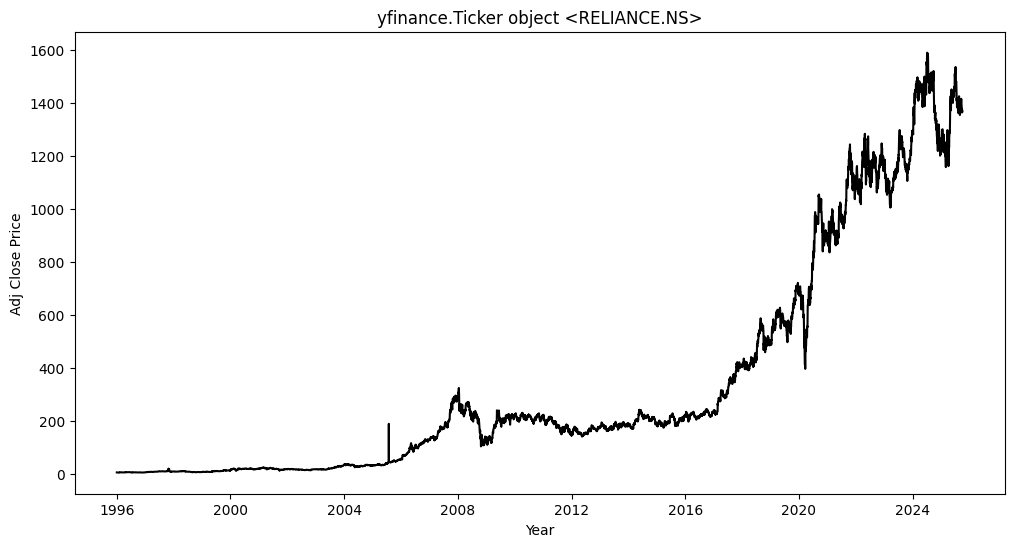

In [255]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Adj Close'],c='black')
plt.title(ticker)
plt.xlabel("Year")
plt.ylabel("Adj Close Price")

In [256]:
df_sample=df.copy()

# 3. Feature Engineering

#### 1. MACD
#### 2. RSI
#### 3. Daily % Return
#### 4. MA's
#### 5. Close Lags

In [257]:
# Calculate MACD
 
          #short_term=12
          #long_term=26
          #signal_period=9

# Calculate short-term and long-term EMAs

          #short_ema=df['Close'].ewm(span=short_term,adjust=False).mean()
          #long_ema=df['Close'].ewm(span=long_term,adjust=False).mean()

# Calculate MACD Line

          #macd_line=short_ema-long_ema

# Calculate Signal Line

          #signal_line=macd_line.ewm(span=signal_period,adjust=False).mean()

# Calculate MACD Histogram

          #macd_histogram=macd_line-signal_line

# Add MACD components to the DataFrame

          #df['MACD']=macd_line
          #df['Signal']=signal_line
          #df['Histogram']=macd_histogram

In [258]:
from ta.trend import MACD
from ta.momentum import RSIIndicator
# 1. MACD
# adds MACD Line,Signal Line and MACD histogram
macd_indicator=MACD(close=df_sample['Adj Close'],window_fast=12,window_slow=26,window_sign=9,fillna=False)

df_sample['MACD_Line']=macd_indicator.macd()
df_sample['MACD_Signal']=macd_indicator.macd_signal()
df_sample['MACD_Histogram']=macd_indicator.macd_diff()

In [259]:
# 2. RSI
rsi_indicator=RSIIndicator(close=df_sample['Adj Close'],window=14,fillna=False)

df_sample['RSI_14']=rsi_indicator.rsi()

In [260]:
df_sample.sample(9)

,Date,Open,Close,Adj Close,High,Low,Volume,MACD_Line,MACD_Signal,MACD_Histogram,RSI_14
486,1997-11-11,12.431800,12.528198,8.557761,12.663870,12.392527,61484950,-0.019018,0.928340,-0.947358,38.570503
4052,2011-11-25,175.940475,172.306000,155.766251,176.294769,171.665970,16185464,-3.705801,-0.907849,-2.797953,31.983160
7364,2025-05-06,1431.000000,1420.900024,1415.247681,1432.000000,1410.599976,14084117,47.138334,30.530457,16.607877,75.695004
2108,2004-01-30,40.879986,40.026684,32.958580,41.372688,39.844597,86396915,0.419930,0.635653,-0.215723,50.349980
1520,2001-10-29,18.994020,18.597715,14.321016,19.308207,18.358505,30511794,-0.033005,-0.060267,0.027262,44.791912
3475,2009-07-28,222.525726,218.022629,192.600433,223.977234,215.508224,50364983,-1.495007,-2.692669,1.197662,45.146184
661,1998-07-14,10.496695,10.546679,7.435905,10.621656,10.407437,50045450,-0.155984,-0.244220,0.088236,47.274592
3052,2007-11-01,322.302277,306.370026,269.228607,324.473816,302.878418,52379007,12.212012,12.568010,-0.355998,58.759764
7154,2024-06-28,1531.025024,1565.400024,1553.898926,1581.000000,1531.025024,28957336,18.104193,8.687700,9.416493,67.137252


In [261]:
# 3. Daily % Return
df_sample['Daily % Return']=100*(df_sample['Close']-df_sample['Close'].shift(1))/df_sample['Close'].shift(1)

In [262]:
# 4. MA (Moving Averages)
ma_windows=[10,20,50,100,200]
for w in ma_windows:
    df_sample[f'SMA_{w}']=df_sample['Adj Close'].rolling(window=w).mean()           # SMA features
    df_sample[f'EMA_{w}']=df_sample['Adj Close'].ewm(span=w,adjust=False).mean()    # EMA features

df_sample=df_sample.fillna(0)

In [ ]:
# 5. Close Lags
def create_lags(data,column='Close',lags=[2,5,7,14]):
    for lag in lags:
        data[f'{column}_LAG{lag}']=data[column].shift(lag)
    return data

lags=[1,2,3,5,7,14]
df_sample=create_lags(df_sample,column='Close',lags=lags)
df_sample=df_sample.dropna()

In [264]:
df_sample

,Date,Open,Close,Adj Close,High,Low,Volume,MACD_Line,MACD_Signal,MACD_Histogram,...,SMA_100,EMA_100,SMA_200,EMA_200,Close_LAG1,Close_LAG2,Close_LAG3,Close_LAG5,Close_LAG7,Close_LAG14
14,1996-01-19,6.114146,6.090939,3.828280,6.190908,6.049881,324535340,0.000000,0.000000,0.000000,...,0.000000,4.524039,0.000000,4.568519,6.199833,6.376563,6.640766,6.697891,6.564004,7.345901
15,1996-01-22,6.110576,6.194478,3.893356,6.274810,6.105220,338613971,0.000000,0.000000,0.000000,...,0.000000,4.511550,0.000000,4.561801,6.090939,6.199833,6.376563,6.628270,6.769297,7.288776
16,1996-01-23,6.215900,5.932061,3.728421,6.242677,5.605378,354919302,0.000000,0.000000,0.000000,...,0.000000,4.496043,0.000000,4.553508,6.194478,6.090939,6.199833,6.640766,6.697891,7.344116
17,1996-01-24,5.880291,5.728553,3.600513,5.915994,5.641081,351185727,0.000000,0.000000,0.000000,...,0.000000,4.478309,0.000000,4.544026,5.932061,6.194478,6.090939,6.376563,6.628270,7.276280
18,1996-01-25,5.716057,5.487558,3.449042,5.741049,5.453640,360855771,0.000000,0.000000,0.000000,...,0.000000,4.457928,0.000000,4.533131,5.728553,5.932061,6.194478,6.199833,6.640766,7.226296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,2025-09-25,1381.300049,1372.400024,1372.400024,1384.500000,1369.000000,11411143,-1.433486,-1.239952,-0.193534,...,1421.620132,1392.063052,1336.313365,1374.430214,1383.000000,1389.800049,1390.599976,1415.000000,1405.300049,1375.000000
7466,2025-09-26,1372.000000,1377.599976,1377.599976,1382.699951,1366.000000,9879109,-2.299547,-1.451871,-0.847676,...,1421.382102,1391.776654,1336.802672,1374.461754,1372.400024,1383.000000,1389.800049,1407.400024,1413.800049,1378.500000
7467,2025-09-29,1381.599976,1372.800049,1372.800049,1389.000000,1368.000000,14231999,-3.334779,-1.828453,-1.506326,...,1421.392888,1391.400880,1337.301096,1374.445219,1377.599976,1372.400024,1383.000000,1390.599976,1415.000000,1376.199951
7468,2025-09-30,1377.099976,1364.000000,1364.000000,1377.099976,1362.800049,14604684,-4.809853,-2.424733,-2.385120,...,1420.725033,1390.858288,1337.831714,1374.341287,1372.800049,1377.599976,1372.400024,1389.800049,1407.400024,1377.000000


# 4. EDA

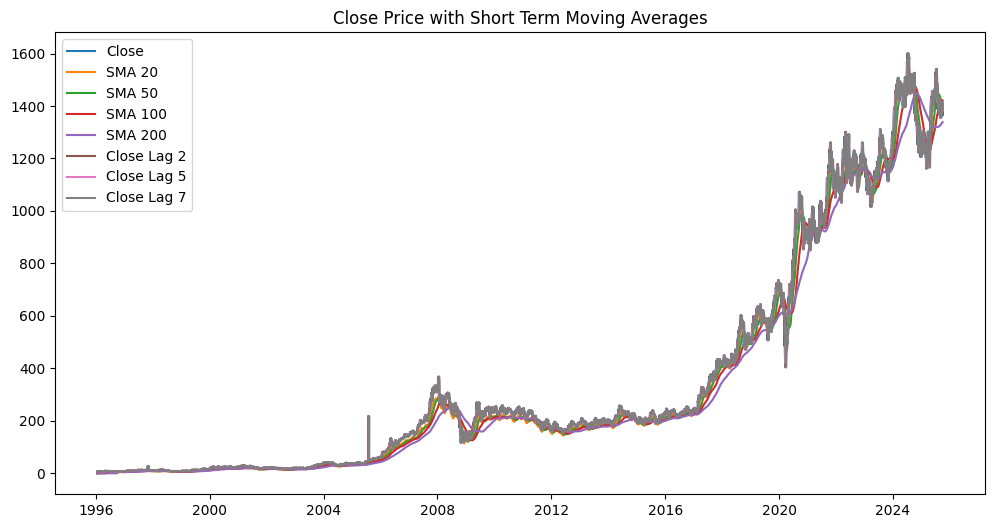

In [265]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['SMA_20'],label='SMA 20')
plt.plot(df_sample['Date'],df_sample['SMA_50'],label='SMA 50')
plt.plot(df_sample['Date'],df_sample['SMA_100'],label='SMA 100')
plt.plot(df_sample['Date'],df_sample['SMA_200'],label='SMA 200')
plt.plot(df_sample['Date'],df_sample['Close_LAG2'],label='Close Lag 2')
plt.plot(df_sample['Date'],df_sample['Close_LAG5'],label='Close Lag 5')
plt.plot(df_sample['Date'],df_sample['Close_LAG7'],label='Close Lag 7')
#plt.plot(df_sample['Date'],df_sample['Close_LAG14'],label='Close Lag 14')
plt.title("Close Price with Short Term Moving Averages")
plt.legend()

<BarContainer object of 7456 artists>

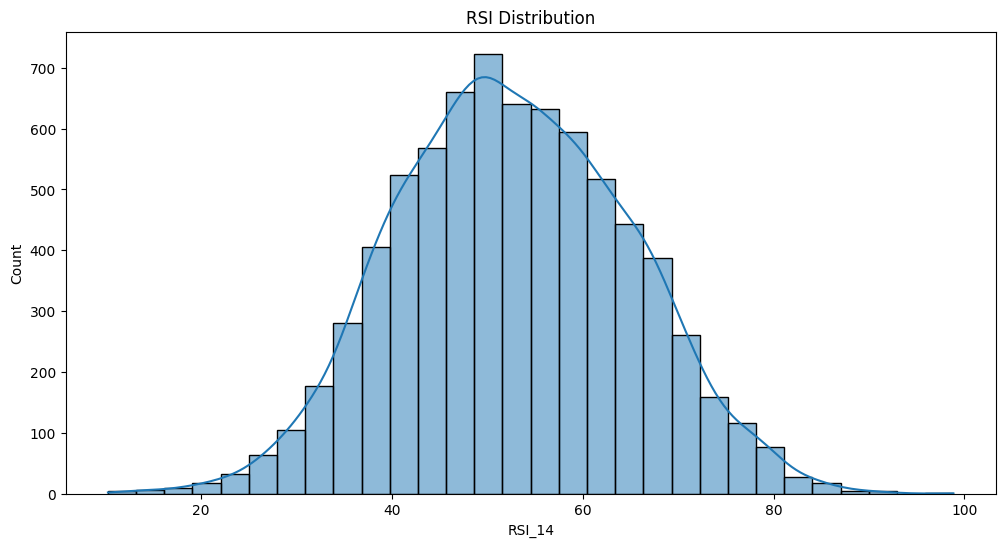

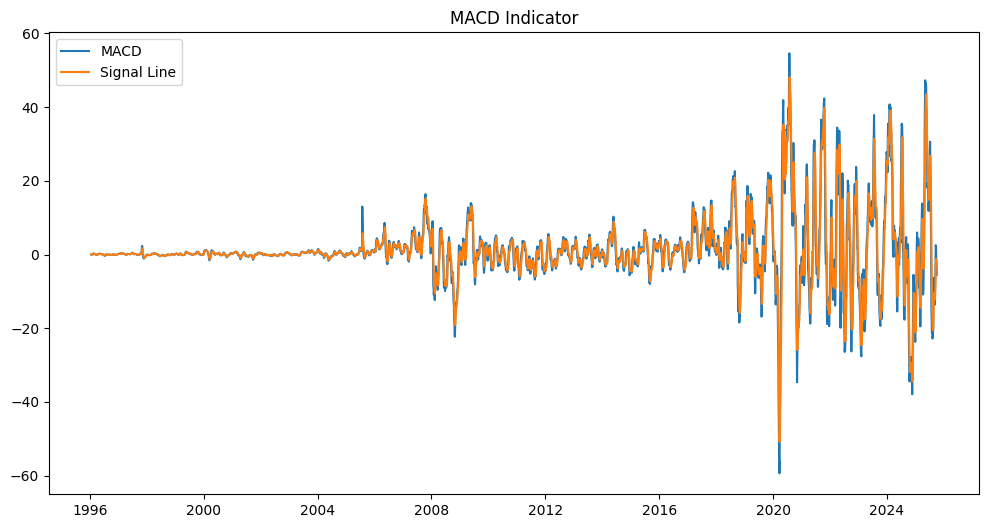

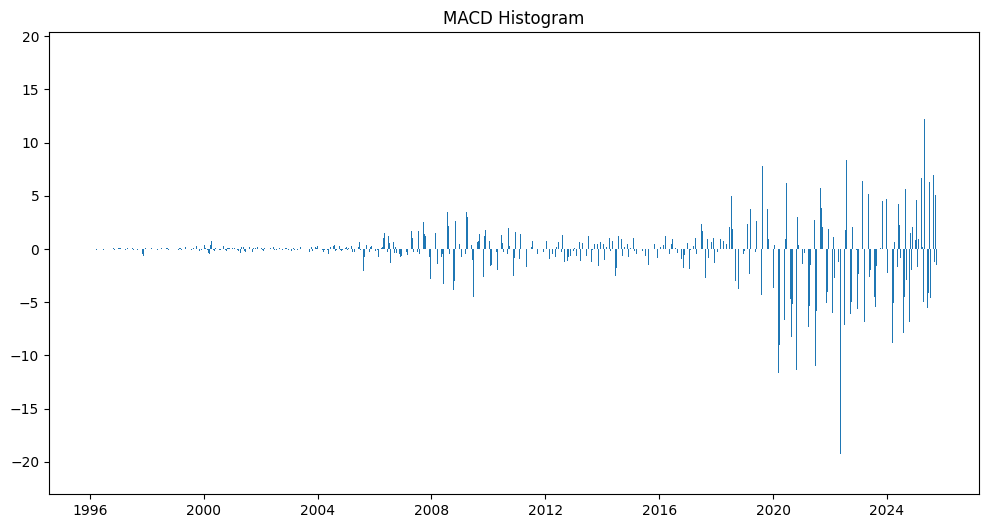

In [ ]:
plt.figure(figsize=(12,6))
plt.title("RSI Distribution")
import seaborn as sns
sns.histplot(df_sample['RSI_14'],bins=30,kde=True)

plt.figure(figsize=(12,6))
plt.title("MACD Indicator")
plt.plot(df_sample['Date'],df_sample['MACD_Line'],label='MACD')
plt.plot(df_sample['Date'],df_sample['MACD_Signal'],label='Signal Line')
plt.legend()

plt.figure(figsize=(12,6))
plt.title("MACD Histogram")
plt.bar(df_sample['Date'],df_sample['MACD_Histogram'],label='Histogram')

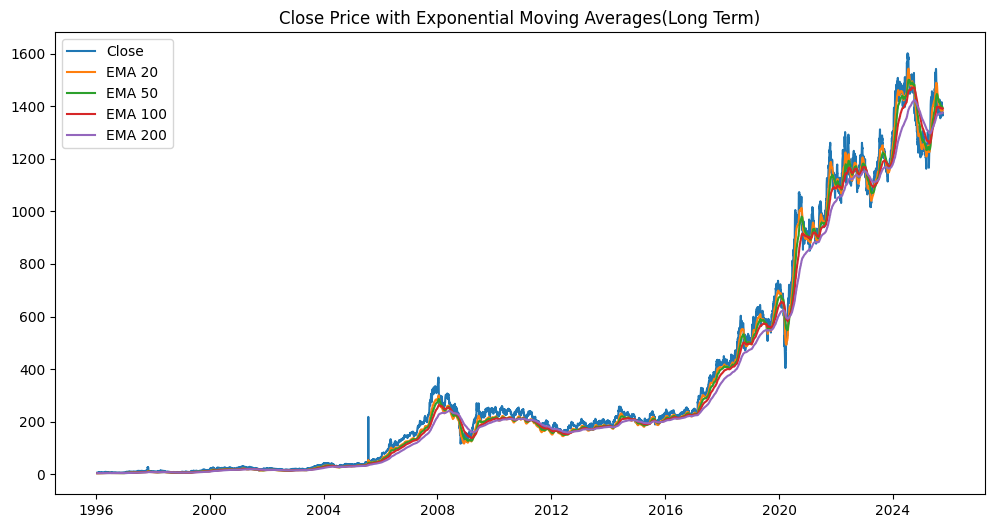

In [267]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['EMA_20'],label='EMA 20')
plt.plot(df_sample['Date'],df_sample['EMA_50'],label='EMA 50')
plt.plot(df_sample['Date'],df_sample['EMA_100'],label='EMA 100')
plt.plot(df_sample['Date'],df_sample['EMA_200'],label='EMA 200')
plt.title("Close Price with Exponential Moving Averages(Long Term)")
plt.legend()

In [268]:
df_sample.to_csv('Data Complete.csv')